In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [2]:
df = pd.read_csv('dataset-pre.csv', low_memory=False)

In [3]:
df

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,3000.0,NaN,1.0,31.0,warehouse,Non-refrigerated warehouse,3000.0,100124.0,1067.0,NaN,NaN,NaN,NaN
1,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,555900.0,1965.0,1.0,31.0,warehouse,Non-refrigerated warehouse,555900.0,100124.0,1067.0,NaN,NaN,NaN,NaN
2,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,8500.0,1990.0,1.0,31.0,warehouse,Non-refrigerated warehouse,8500.0,100124.0,1067.0,NaN,NaN,NaN,NaN
3,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,6000.0,2000.0,1.0,31.0,warehouse,Non-refrigerated warehouse,6000.0,100124.0,1067.0,NaN,NaN,NaN,NaN
4,Abbeville,Henry County,1.0,AL,1.0,Industrial,NaN,130800.0,NaN,1.0,22.0,no_match,Other,130800.0,100124.0,1067.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398502 entries, 0 to 398501
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   city_name                  362698 non-null  object 
 1   countyname                 362698 non-null  object 
 2   statefp                    362698 non-null  float64
 3   statecode                  362698 non-null  object 
 4   bldg_count                 362698 non-null  float64
 5   reported_propertytype      362698 non-null  object 
 6   reported_propertysubtype   272648 non-null  object 
 7   rentablebuildingarea_mean  362698 non-null  float64
 8   yearbuilt_mean             300649 non-null  float64
 9   stories                    362698 non-null  float64
 10  index                      362698 non-null  float64
 11  doe_prototype              362698 non-null  object 
 12  cbecs                      362693 non-null  object 
 13  area_sum                   36

### We have 362698 have raw data file. We now move forward with processing and cleaning this data file.

In [5]:
df.columns[df.isnull().any()]

Index(['city_name', 'countyname', 'statefp', 'statecode', 'bldg_count',
       'reported_propertytype', 'reported_propertysubtype',
       'rentablebuildingarea_mean', 'yearbuilt_mean', 'stories', 'index',
       'doe_prototype', 'cbecs', 'area_sum', 'placeid', 'countyid',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [6]:
df = df[df.columns[:-1]]

In [7]:
df.columns[df.isnull().any()]

Index(['city_name', 'countyname', 'statefp', 'statecode', 'bldg_count',
       'reported_propertytype', 'reported_propertysubtype',
       'rentablebuildingarea_mean', 'yearbuilt_mean', 'stories', 'index',
       'doe_prototype', 'cbecs', 'area_sum', 'placeid', 'countyid',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [8]:
df = df[df.columns[:-1:]]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398502 entries, 0 to 398501
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   city_name                  362698 non-null  object 
 1   countyname                 362698 non-null  object 
 2   statefp                    362698 non-null  float64
 3   statecode                  362698 non-null  object 
 4   bldg_count                 362698 non-null  float64
 5   reported_propertytype      362698 non-null  object 
 6   reported_propertysubtype   272648 non-null  object 
 7   rentablebuildingarea_mean  362698 non-null  float64
 8   yearbuilt_mean             300649 non-null  float64
 9   stories                    362698 non-null  float64
 10  index                      362698 non-null  float64
 11  doe_prototype              362698 non-null  object 
 12  cbecs                      362693 non-null  object 
 13  area_sum                   36

In [10]:
df.isna().sum()

city_name                     35804
countyname                    35804
statefp                       35804
statecode                     35804
bldg_count                    35804
reported_propertytype         35804
reported_propertysubtype     125854
rentablebuildingarea_mean     35804
yearbuilt_mean                97853
stories                       35804
index                         35804
doe_prototype                 35804
cbecs                         35809
area_sum                      35804
placeid                      106047
countyid                      35804
Unnamed: 16                  398502
Unnamed: 17                  398502
dtype: int64

### This is the list of columns containing null values. We drop or make changes in this to clean the data.

In [11]:
df = df[df['yearbuilt_mean'].notna()]

In [12]:
df.isna().sum()

city_name                         0
countyname                        0
statefp                           0
statecode                         0
bldg_count                        0
reported_propertytype             0
reported_propertysubtype      75254
rentablebuildingarea_mean         0
yearbuilt_mean                    0
stories                           0
index                             0
doe_prototype                     0
cbecs                             1
area_sum                          0
placeid                       52843
countyid                          0
Unnamed: 16                  300649
Unnamed: 17                  300649
dtype: int64

In [13]:
df

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid,Unnamed: 16,Unnamed: 17
1,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,555900.0,1965.0,1.0,31.0,warehouse,Non-refrigerated warehouse,555900.0,100124.0,1067.0,NaN,NaN
2,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,8500.0,1990.0,1.0,31.0,warehouse,Non-refrigerated warehouse,8500.0,100124.0,1067.0,NaN,NaN
3,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,6000.0,2000.0,1.0,31.0,warehouse,Non-refrigerated warehouse,6000.0,100124.0,1067.0,NaN,NaN
5,Abbeville,Henry County,1.0,AL,1.0,Industrial,NaN,92000.0,1975.0,1.0,22.0,no_match,Other,92000.0,100124.0,1067.0,NaN,NaN
7,Abbeville,Henry County,1.0,AL,1.0,Multi-Family,Apartments,15000.0,1985.0,1.0,33.0,apartment,Apartments,15000.0,100124.0,1067.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362682,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,8400.0,2013.0,1.0,9.0,retail,Retail store,8400.0,4880560.0,48285.0,NaN,NaN
362693,Yoakum,DeWitt County,48.0,TX,1.0,Retail,NaN,2400.0,2000.0,1.0,45.0,retail,Retail store,2400.0,4880560.0,48123.0,NaN,NaN
362694,Yoakum,Lavaca County,48.0,TX,1.0,Retail,NaN,46700.0,1975.0,1.0,45.0,retail,Retail store,46700.0,4880560.0,48285.0,NaN,NaN
362695,Yoakum,Lavaca County,48.0,TX,1.0,Retail,NaN,5700.0,2016.0,1.0,45.0,retail,Retail store,5700.0,4880560.0,48285.0,NaN,NaN


In [14]:
df['yearbuilt_mean'].isnull().sum()

0

In [15]:
nan_rows = df[df['reported_propertysubtype'].isna()]

In [16]:
nan_rows

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid,Unnamed: 16,Unnamed: 17
5,Abbeville,Henry County,1.0,AL,1.0,Industrial,NaN,92000.0,1975.0,1.0,22.0,no_match,Other,92000.0,100124.0,1067.0,NaN,NaN
10,Abbeville,Henry County,1.0,AL,1.0,Office,NaN,1100.0,1910.0,1.0,37.0,office,Administrative/professional office,1100.0,100124.0,1067.0,NaN,NaN
11,Abbeville,Henry County,1.0,AL,1.0,Office,NaN,3300.0,1995.0,1.0,37.0,office,Administrative/professional office,3300.0,100124.0,1067.0,NaN,NaN
12,Abbeville,Henry County,1.0,AL,1.0,Office,NaN,15000.0,2010.0,1.0,37.0,office,Administrative/professional office,15000.0,100124.0,1067.0,NaN,NaN
29,Abbeville,Henry County,1.0,AL,1.0,Retail,NaN,7700.0,1950.0,1.0,45.0,retail,Retail store,7700.0,100124.0,1067.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362670,Yoakum,Lavaca County,48.0,TX,1.0,Office,NaN,2500.0,1940.0,1.0,37.0,office,Administrative/professional office,2500.0,4880560.0,48285.0,NaN,NaN
362671,Yoakum,Lavaca County,48.0,TX,1.0,Office,NaN,1300.0,1980.0,1.0,37.0,office,Administrative/professional office,1300.0,4880560.0,48285.0,NaN,NaN
362693,Yoakum,DeWitt County,48.0,TX,1.0,Retail,NaN,2400.0,2000.0,1.0,45.0,retail,Retail store,2400.0,4880560.0,48123.0,NaN,NaN
362694,Yoakum,Lavaca County,48.0,TX,1.0,Retail,NaN,46700.0,1975.0,1.0,45.0,retail,Retail store,46700.0,4880560.0,48285.0,NaN,NaN


In [17]:
df.reported_propertysubtype.unique()

array(['Warehouse', nan, 'Apartments', 'Medical', 'Bank', 'Freestanding',
       'Restaurant', 'Service Station', 'Storefront', 'Supermarket',
       'Showroom', 'Assisted Living', 'Manufacturing', 'Service',
       'Office/Residential', 'Auto Repair', 'Convenience Store',
       'Day Care Center', 'Drug Store', 'Fast Food', 'Funeral Home',
       'Storefront Retail/Office', 'Post Office', 'Religious Facility',
       'Light Distribution', 'Light Manufacturing',
       'Skilled Nursing Facility', 'Hotel', 'Distribution',
       'Telecom Hotel/Data Hosting', 'Office Live/Work Unit',
       'Auto Dealership', 'Department Store', 'Health Club',
       'Movie Theatre', 'Veterinarian/Kennel', 'Car Wash', 'Self-Storage',
       'Golf Course/Driving Range', 'Storefront Retail/Residential',
       'Motel', 'Residential Income', 'Schools', 'Hospital',
       'Refrigeration/Cold Storage', 'Industrial Live/Work Unit',
       'Loft/Creative Space', 'Bar', 'Lodge/Meeting Hall',
       'Police / Fir

In [18]:
df = df[df['reported_propertysubtype'].notna()]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225395 entries, 1 to 362697
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   city_name                  225395 non-null  object 
 1   countyname                 225395 non-null  object 
 2   statefp                    225395 non-null  float64
 3   statecode                  225395 non-null  object 
 4   bldg_count                 225395 non-null  float64
 5   reported_propertytype      225395 non-null  object 
 6   reported_propertysubtype   225395 non-null  object 
 7   rentablebuildingarea_mean  225395 non-null  float64
 8   yearbuilt_mean             225395 non-null  float64
 9   stories                    225395 non-null  float64
 10  index                      225395 non-null  float64
 11  doe_prototype              225395 non-null  object 
 12  cbecs                      225395 non-null  object 
 13  area_sum                   225395 

In [20]:
df = df[df.columns[:-1]]

In [21]:
df = df[df.columns[:-1]]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225395 entries, 1 to 362697
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   city_name                  225395 non-null  object 
 1   countyname                 225395 non-null  object 
 2   statefp                    225395 non-null  float64
 3   statecode                  225395 non-null  object 
 4   bldg_count                 225395 non-null  float64
 5   reported_propertytype      225395 non-null  object 
 6   reported_propertysubtype   225395 non-null  object 
 7   rentablebuildingarea_mean  225395 non-null  float64
 8   yearbuilt_mean             225395 non-null  float64
 9   stories                    225395 non-null  float64
 10  index                      225395 non-null  float64
 11  doe_prototype              225395 non-null  object 
 12  cbecs                      225395 non-null  object 
 13  area_sum                   225395 

### -> Finally performed cleaning, and removed all null values from the dataset. 

### -> We now have clean data to work with. 

### -> Next we perform Outlier Analysis to see if the data contains outliers

## Outlier Analysis

<Axes: xlabel='rentablebuildingarea_mean', ylabel='Density'>

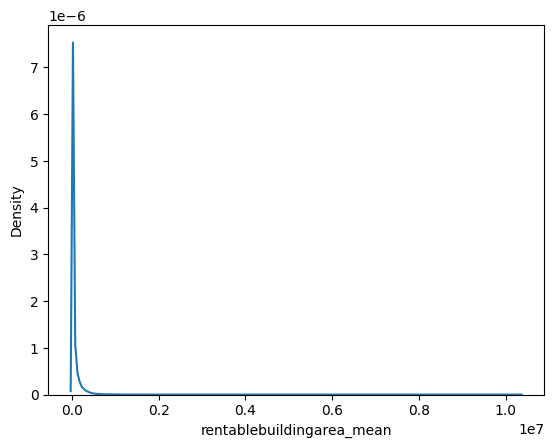

In [23]:
sns.kdeplot(df.rentablebuildingarea_mean)

## Highly skewed data. Therefore not normally distributed.

In [24]:
df

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid
1,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,555900.0,1965.0,1.0,31.0,warehouse,Non-refrigerated warehouse,555900.0,100124.0,1067.0
2,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,8500.0,1990.0,1.0,31.0,warehouse,Non-refrigerated warehouse,8500.0,100124.0,1067.0
3,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,6000.0,2000.0,1.0,31.0,warehouse,Non-refrigerated warehouse,6000.0,100124.0,1067.0
7,Abbeville,Henry County,1.0,AL,1.0,Multi-Family,Apartments,15000.0,1985.0,1.0,33.0,apartment,Apartments,15000.0,100124.0,1067.0
8,Abbeville,Henry County,1.0,AL,1.0,Office,Medical,7800.0,2013.0,1.0,40.0,outpatient,Medical office (diagnostic),7800.0,100124.0,1067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362679,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,4700.0,1960.0,1.0,9.0,retail,Retail store,4700.0,4880560.0,48285.0
362680,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,10300.0,1980.0,1.0,9.0,retail,Retail store,10300.0,4880560.0,48285.0
362681,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,2600.0,2000.0,1.0,9.0,retail,Retail store,2600.0,4880560.0,48285.0
362682,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,8400.0,2013.0,1.0,9.0,retail,Retail store,8400.0,4880560.0,48285.0


In [25]:
df['area_transformed'] = np.log(df.rentablebuildingarea_mean)

C:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
zero_area = (df['rentablebuildingarea_mean'] == 0)
zero_area

1         False
2         False
3         False
7         False
8         False
          ...  
362679    False
362680    False
362681    False
362682    False
362697    False
Name: rentablebuildingarea_mean, Length: 225395, dtype: bool

In [27]:
zero_count = (df['rentablebuildingarea_mean'] == 0).sum()

In [28]:
df.shape

(225395, 17)

In [29]:
zero_year = (df['yearbuilt_mean'] == 0)
zero_year

1         False
2         False
3         False
7         False
8         False
          ...  
362679    False
362680    False
362681    False
362682    False
362697    False
Name: yearbuilt_mean, Length: 225395, dtype: bool

<Axes: xlabel='yearbuilt_mean', ylabel='Density'>

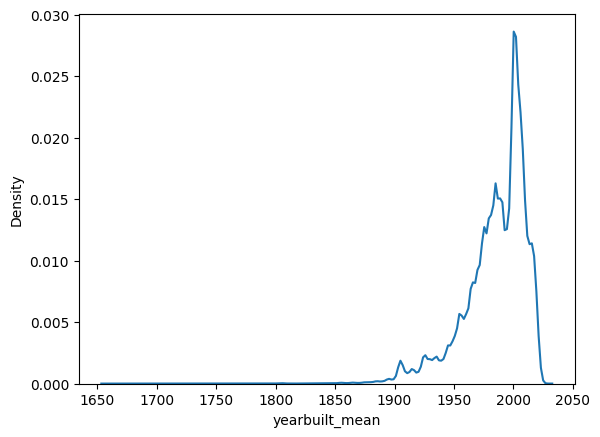

In [30]:
sns.kdeplot(df.yearbuilt_mean)

In [31]:
df['area_sum']

1         555900.0
2           8500.0
3           6000.0
7          15000.0
8           7800.0
            ...   
362679      4700.0
362680     10300.0
362681      2600.0
362682      8400.0
362697      5600.0
Name: area_sum, Length: 225395, dtype: float64

<Axes: xlabel='area_sum', ylabel='Density'>

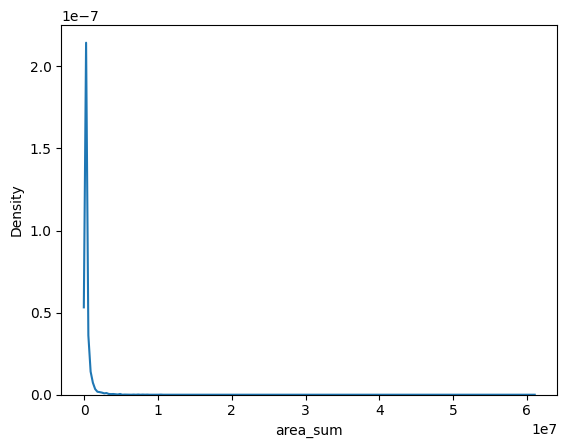

In [32]:
sns.kdeplot(df.area_sum)

In [33]:
df.describe()

C:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,statefp,bldg_count,rentablebuildingarea_mean,yearbuilt_mean,stories,index,area_sum,placeid,countyid,area_transformed
count,225395.000000,225395.000000,2.253950e+05,225395.000000,225395.000000,225395.000000,2.253950e+05,1.850660e+05,225395.000000,2.253950e+05
mean,36.428914,1.674593,3.245943e+04,1985.065742,1.674593,38.390971,5.326086e+04,3.702141e+06,36581.841314,-inf
std,16.957834,3.656465,9.490404e+04,26.160030,3.656465,24.146337,3.204456e+05,1.701176e+06,17006.827810,NaN
min,1.000000,1.000000,0.000000e+00,1660.000000,1.000000,2.000000,0.000000e+00,1.001240e+05,1001.000000,-inf
25%,22.000000,1.000000,3.600000e+03,1975.000000,1.000000,20.000000,4.700000e+03,2.829180e+06,22109.000000,8.188689e+00
50%,47.000000,1.000000,8.400000e+03,1990.000000,1.000000,33.000000,1.100000e+04,4.751560e+06,47155.000000,9.035987e+00
75%,48.000000,1.000000,2.500000e+04,2004.000000,1.000000,58.000000,3.180000e+04,4.835000e+06,48189.000000,1.012663e+01
max,48.000000,290.000000,1.033680e+07,2026.000000,290.000000,114.000000,6.102270e+07,4.880560e+06,48507.000000,1.615122e+01


In [34]:
df

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid,area_transformed
1,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,555900.0,1965.0,1.0,31.0,warehouse,Non-refrigerated warehouse,555900.0,100124.0,1067.0,13.228344
2,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,8500.0,1990.0,1.0,31.0,warehouse,Non-refrigerated warehouse,8500.0,100124.0,1067.0,9.047821
3,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,6000.0,2000.0,1.0,31.0,warehouse,Non-refrigerated warehouse,6000.0,100124.0,1067.0,8.699515
7,Abbeville,Henry County,1.0,AL,1.0,Multi-Family,Apartments,15000.0,1985.0,1.0,33.0,apartment,Apartments,15000.0,100124.0,1067.0,9.615805
8,Abbeville,Henry County,1.0,AL,1.0,Office,Medical,7800.0,2013.0,1.0,40.0,outpatient,Medical office (diagnostic),7800.0,100124.0,1067.0,8.961879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362679,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,4700.0,1960.0,1.0,9.0,retail,Retail store,4700.0,4880560.0,48285.0,8.455318
362680,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,10300.0,1980.0,1.0,9.0,retail,Retail store,10300.0,4880560.0,48285.0,9.239899
362681,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,2600.0,2000.0,1.0,9.0,retail,Retail store,2600.0,4880560.0,48285.0,7.863267
362682,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,8400.0,2013.0,1.0,9.0,retail,Retail store,8400.0,4880560.0,48285.0,9.035987


In [35]:
df = df.assign(rentablebuildingarea_mean=df['area_sum'])
df

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid,area_transformed
1,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,555900.0,1965.0,1.0,31.0,warehouse,Non-refrigerated warehouse,555900.0,100124.0,1067.0,13.228344
2,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,8500.0,1990.0,1.0,31.0,warehouse,Non-refrigerated warehouse,8500.0,100124.0,1067.0,9.047821
3,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,6000.0,2000.0,1.0,31.0,warehouse,Non-refrigerated warehouse,6000.0,100124.0,1067.0,8.699515
7,Abbeville,Henry County,1.0,AL,1.0,Multi-Family,Apartments,15000.0,1985.0,1.0,33.0,apartment,Apartments,15000.0,100124.0,1067.0,9.615805
8,Abbeville,Henry County,1.0,AL,1.0,Office,Medical,7800.0,2013.0,1.0,40.0,outpatient,Medical office (diagnostic),7800.0,100124.0,1067.0,8.961879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362679,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,4700.0,1960.0,1.0,9.0,retail,Retail store,4700.0,4880560.0,48285.0,8.455318
362680,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,10300.0,1980.0,1.0,9.0,retail,Retail store,10300.0,4880560.0,48285.0,9.239899
362681,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,2600.0,2000.0,1.0,9.0,retail,Retail store,2600.0,4880560.0,48285.0,7.863267
362682,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,8400.0,2013.0,1.0,9.0,retail,Retail store,8400.0,4880560.0,48285.0,9.035987


<Axes: xlabel='rentablebuildingarea_mean', ylabel='Density'>

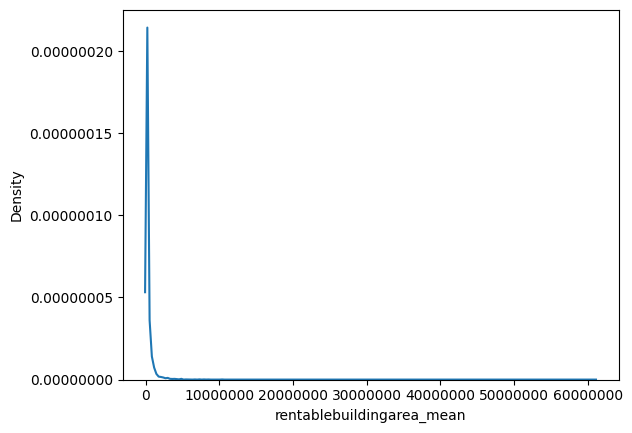

In [36]:
plt.ticklabel_format(style='plain')
sns.kdeplot(df.rentablebuildingarea_mean)

In [37]:
df['rentablebuildingarea_mean']

1         555900.0
2           8500.0
3           6000.0
7          15000.0
8           7800.0
            ...   
362679      4700.0
362680     10300.0
362681      2600.0
362682      8400.0
362697      5600.0
Name: rentablebuildingarea_mean, Length: 225395, dtype: float64

In [38]:
df = df[df.columns[:-1]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225395 entries, 1 to 362697
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   city_name                  225395 non-null  object 
 1   countyname                 225395 non-null  object 
 2   statefp                    225395 non-null  float64
 3   statecode                  225395 non-null  object 
 4   bldg_count                 225395 non-null  float64
 5   reported_propertytype      225395 non-null  object 
 6   reported_propertysubtype   225395 non-null  object 
 7   rentablebuildingarea_mean  225395 non-null  float64
 8   yearbuilt_mean             225395 non-null  float64
 9   stories                    225395 non-null  float64
 10  index                      225395 non-null  float64
 11  doe_prototype              225395 non-null  object 
 12  cbecs                      225395 non-null  object 
 13  area_sum                   225395 

In [39]:
def find_anomalies(data) : 
    anomalies = []

    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)

    anamoly_cut_off = random_data_std*3

    lower_limit = random_data_mean - anamoly_cut_off
    upper_limit = random_data_mean + anamoly_cut_off

    for outlier in data : 
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [40]:
list1 = find_anomalies(df['rentablebuildingarea_mean'])
print(len(list1))
print("Max Outlier : ", max(list1))
print("Min Outlier : ", min(list1))

1396
Max Outlier :  61022700.0
Min Outlier :  1014600.0


### Therefore we have 0.6% Anomaly in our dataset

1. An acceptable range for normally distributed data is < 0.3 %

In [41]:
df.rentablebuildingarea_mean.skew()

71.09042957775038

<Axes: xlabel='rentablebuildingarea_mean', ylabel='Density'>

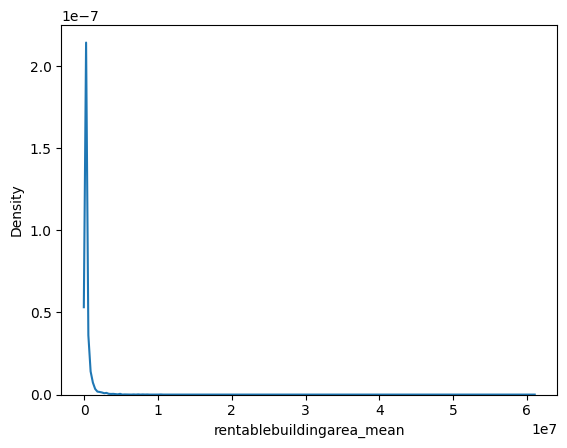

In [42]:
sns.kdeplot(df.rentablebuildingarea_mean)

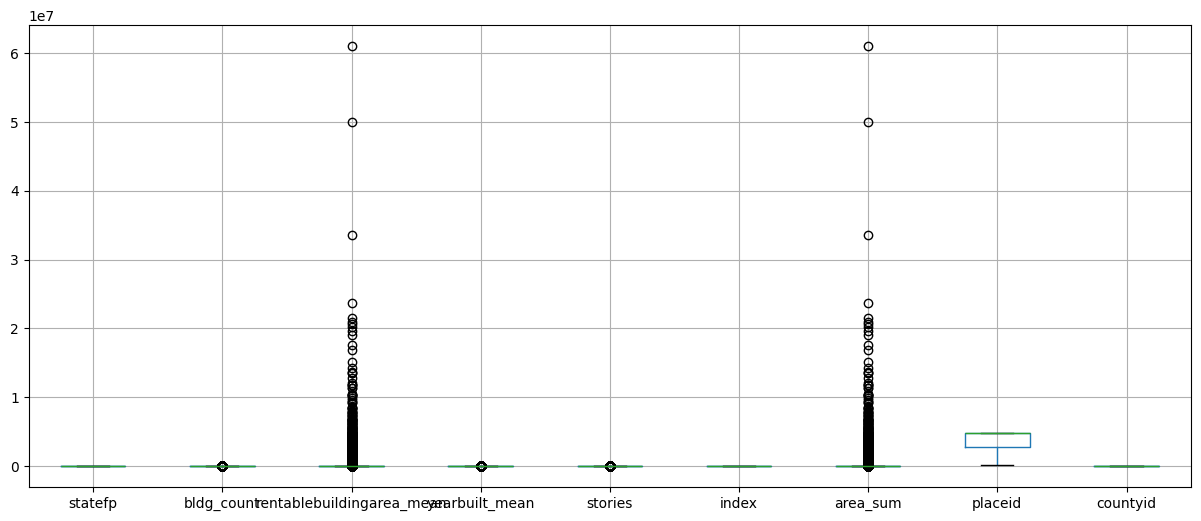

In [43]:
box_plot = df.boxplot(figsize=(15,6))
plt.show()

#sns.boxplot(data=df,layout=(12, 8))

<Axes: >

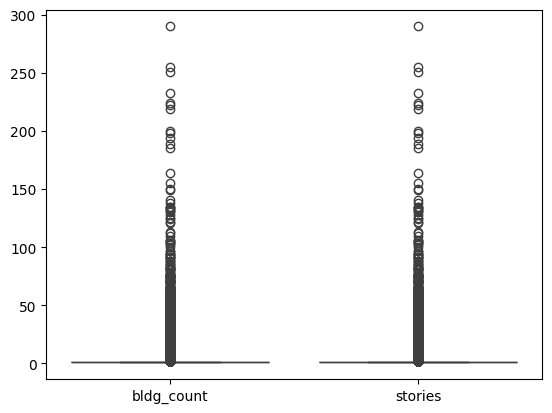

In [44]:
sns.boxplot(data=df[['bldg_count','stories']])

<Axes: ylabel='rentablebuildingarea_mean'>

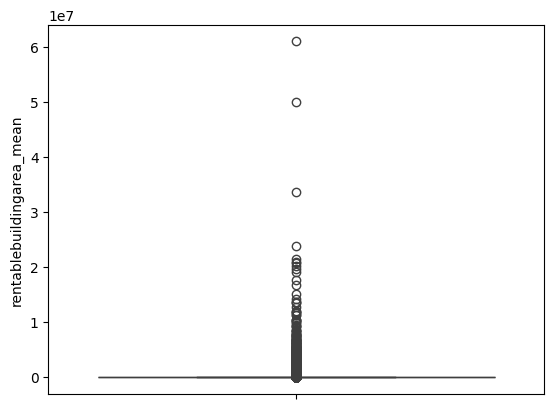

In [45]:
sns.boxplot(df['rentablebuildingarea_mean'])

### Finding outlier data values

In [46]:
upper_limit = df['rentablebuildingarea_mean'].mean() + 3*df['rentablebuildingarea_mean'].std()
lower_limit = df['rentablebuildingarea_mean'].mean() - 3*df['rentablebuildingarea_mean'].std()

df.loc[(df['rentablebuildingarea_mean'] > upper_limit) | (df['rentablebuildingarea_mean'] < lower_limit)]

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid
2023,Auburn,Lee County,1.0,AL,3.0,Multi-Family,Apartments,1155600.0,2008.0,3.0,33.0,apartment,Apartments,1155600.0,103076.0,1081.0
2533,Bessemer,Jefferson County,1.0,AL,4.0,Industrial,Distribution,1124400.0,1990.0,4.0,23.0,warehouse,Distribution/shipping center,1124400.0,105980.0,1073.0
3416,Birmingham,Jefferson County,1.0,AL,1.0,Industrial,Distribution,1311300.0,1990.0,1.0,23.0,warehouse,Distribution/shipping center,1311300.0,107000.0,1073.0
3455,Birmingham,Jefferson County,1.0,AL,1.0,Industrial,Manufacturing,2040100.0,1935.0,1.0,25.0,no_match,Other,2040100.0,107000.0,1073.0
3478,Birmingham,Jefferson County,1.0,AL,6.0,Industrial,Manufacturing,2440800.0,1955.0,6.0,25.0,no_match,Other,2440800.0,107000.0,1073.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361038,Wichita Falls,Wichita County,48.0,TX,4.0,Multi-Family,Apartments,1211600.0,1980.0,4.0,33.0,apartment,Apartments,1211600.0,4879000.0,48485.0
361781,Wilmer,Dallas County,48.0,TX,2.0,Industrial,Distribution,1581400.0,2008.0,2.0,23.0,warehouse,Distribution/shipping center,1581400.0,4879576.0,48113.0
361782,Wilmer,Dallas County,48.0,TX,1.0,Industrial,Distribution,1394100.0,2015.0,1.0,23.0,warehouse,Distribution/shipping center,1394100.0,4879576.0,48113.0
361783,Wilmer,Dallas County,48.0,TX,1.0,Industrial,Distribution,1163100.0,2020.0,1.0,23.0,warehouse,Distribution/shipping center,1163100.0,4879576.0,48113.0


In [47]:
## Trimming the outlier data

new_df = df.loc[(df['rentablebuildingarea_mean'] < upper_limit) & (df['rentablebuildingarea_mean'] > lower_limit)]
print('old data',len(df))
print('new data',len(new_df))

old data 225395
new data 223999


<Axes: xlabel='rentablebuildingarea_mean', ylabel='Density'>

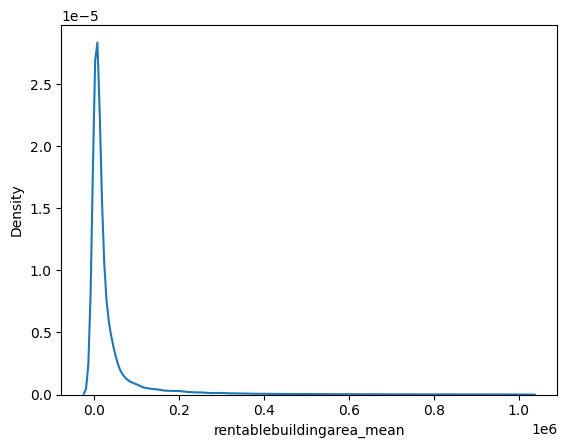

In [48]:
sns.kdeplot(new_df.rentablebuildingarea_mean)

<Axes: ylabel='rentablebuildingarea_mean'>

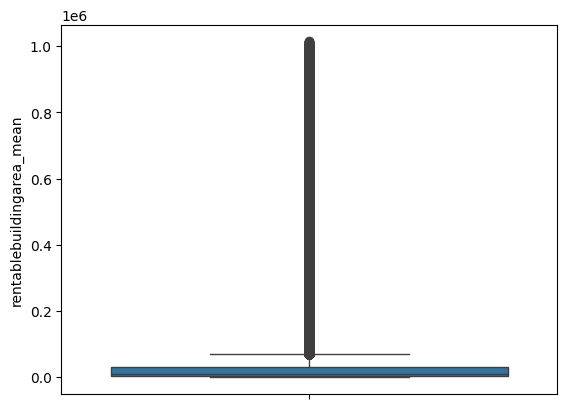

In [49]:
sns.boxplot(new_df.rentablebuildingarea_mean)

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid
3014,Bessemer,Jefferson County,1.0,AL,15.0,Retail,Storefront,31500.0,1925.0,15.0,63.0,strip_mall,Retail store,31500.0,105980.0,1073.0
3742,Birmingham,Jefferson County,1.0,AL,13.0,Industrial,Warehouse,97500.0,1945.0,13.0,31.0,warehouse,Non-refrigerated warehouse,97500.0,107000.0,1073.0
3769,Birmingham,Jefferson County,1.0,AL,16.0,Industrial,Warehouse,104000.0,1955.0,16.0,31.0,warehouse,Non-refrigerated warehouse,104000.0,107000.0,1073.0
3807,Birmingham,Jefferson County,1.0,AL,13.0,Industrial,Warehouse,92300.0,1970.0,13.0,31.0,warehouse,Non-refrigerated warehouse,92300.0,107000.0,1073.0
3819,Birmingham,Jefferson County,1.0,AL,18.0,Industrial,Warehouse,126000.0,1975.0,18.0,31.0,warehouse,Non-refrigerated warehouse,126000.0,107000.0,1073.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350259,Stafford,Fort Bend County,48.0,TX,22.0,Industrial,Warehouse,165000.0,1985.0,22.0,31.0,warehouse,Non-refrigerated warehouse,165000.0,4869908.0,48157.0
351642,Sulphur Springs,Hopkins County,48.0,TX,16.0,Retail,Storefront,27200.0,1905.0,16.0,63.0,strip_mall,Retail store,27200.0,4870904.0,48223.0
352111,Taylor,Williamson County,48.0,TX,21.0,Retail,Storefront,54600.0,1905.0,21.0,63.0,strip_mall,Retail store,54600.0,4871948.0,48491.0
354923,Tyler,Smith County,48.0,TX,16.0,Multi-Family,Apartments,1971200.0,1980.0,16.0,33.0,apartment,Apartments,1971200.0,4874144.0,48423.0


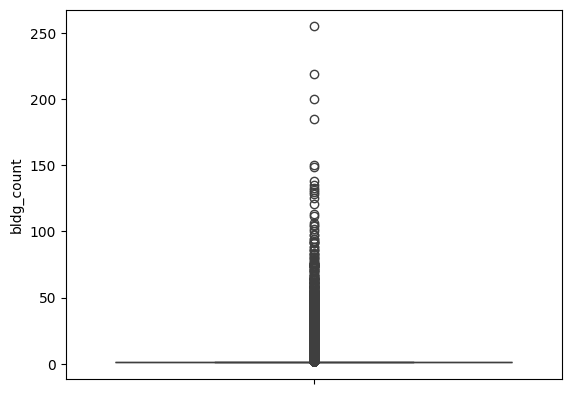

In [50]:
sns.boxplot(new_df.bldg_count)
upper_limit = df['bldg_count'].mean() + 3*df['bldg_count'].std()
lower_limit = df['bldg_count'].mean() - 3*df['bldg_count'].std()

df.loc[(df['bldg_count'] > upper_limit) | (df['bldg_count'] < lower_limit)]

<Axes: xlabel='bldg_count', ylabel='Density'>

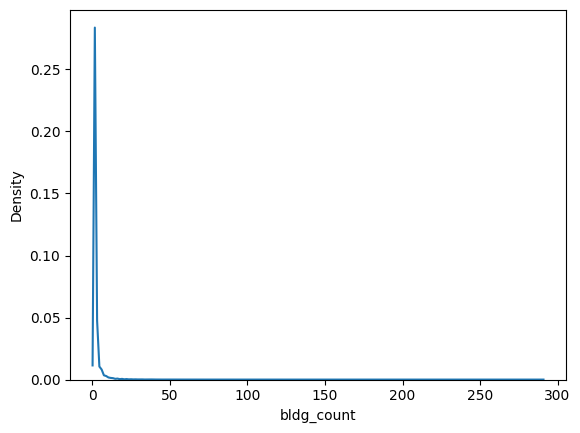

In [51]:
sns.kdeplot(df.bldg_count)

In [52]:

new_df = new_df.loc[(new_df['bldg_count'] < upper_limit) & (new_df['bldg_count'] > lower_limit)]
print('old data',len(df))
print('new data',len(new_df))

old data 225395
new data 222177


<Axes: ylabel='bldg_count'>

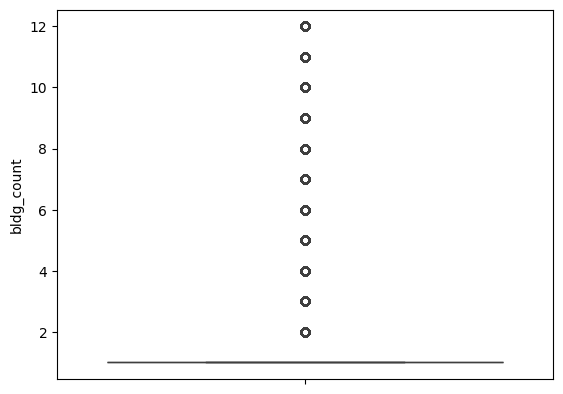

In [53]:
sns.boxplot(new_df.bldg_count)

<Axes: xlabel='bldg_count', ylabel='Density'>

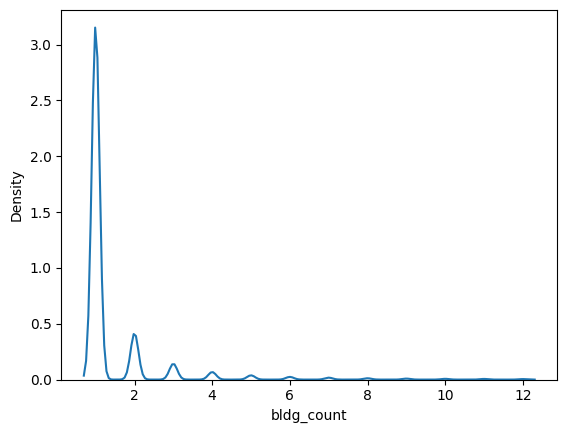

In [54]:
sns.kdeplot(new_df.bldg_count)

In [55]:
new_df.shape

(222177, 16)

In [56]:
upper_limit = new_df['bldg_count'].mean() + 3*new_df['bldg_count'].std()
lower_limit = new_df['bldg_count'].mean() - 3*new_df['bldg_count'].std()

data = new_df.loc[(new_df['bldg_count'] < upper_limit) | (new_df['bldg_count'] > lower_limit)]
print('Length of Trimmed Data', len(data))

Length of Trimmed Data 222177


<Axes: >

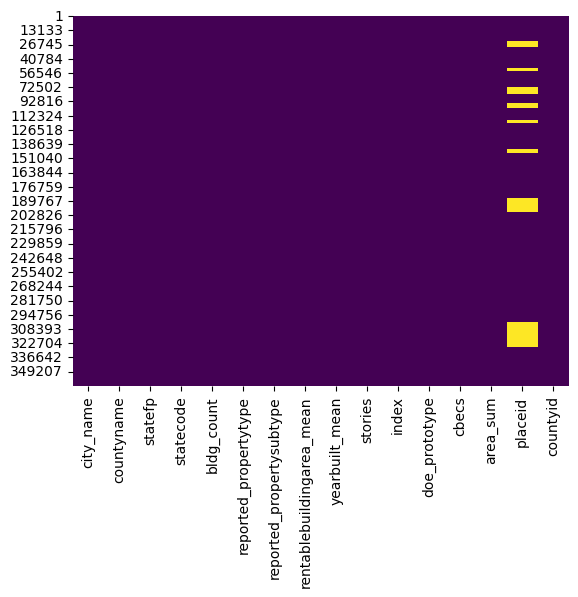

In [57]:
sns.heatmap(new_df.isnull(),cbar=False,cmap='viridis')

<Axes: >

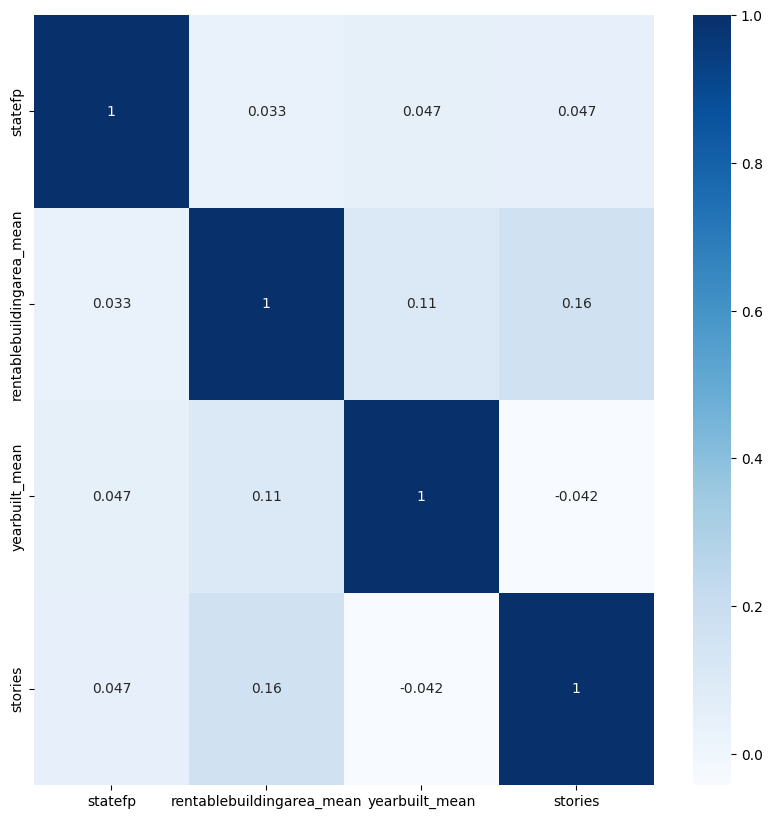

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df[['statefp', 'rentablebuildingarea_mean','yearbuilt_mean','stories']].corr(),annot=True,cmap='Blues')

In [64]:
unique_state = df['statefp'].unique()
unique_state

array([ 1.,  5., 21., 22., 28., 40., 47., 48.])

In [67]:
grouped = new_df.groupby('statecode')['rentablebuildingarea_mean'].agg(['mean', 'median', 'max', 'min']).reset_index()
grouped

,statecode,mean,median,max,min
0,AL,31864.334552,9600.0,1011000.0,0.0
1,AR,32923.043017,9700.0,976800.0,0.0
2,KY,37904.586941,10000.0,1000000.0,0.0
3,LA,39861.585139,10800.0,1000000.0,0.0
4,MS,34574.297537,9000.0,1003200.0,0.0
5,OK,29542.967997,9000.0,1010000.0,0.0
6,TN,37455.957651,10500.0,1013600.0,0.0
7,TX,42094.688213,12000.0,1014500.0,0.0


In [71]:
new_df = new_df[new_df.rentablebuildingarea_mean != 0]
grouped = new_df.groupby('statecode')['rentablebuildingarea_mean'].agg(['mean', 'median', 'max', 'min']).reset_index()
grouped

,statecode,mean,median,max,min
0,AL,31873.928940,9600.0,1011000.0,100.0
1,AR,33009.264261,9800.0,976800.0,100.0
2,KY,37934.179093,10000.0,1000000.0,100.0
3,LA,39891.225679,10800.0,1000000.0,100.0
4,MS,34604.266590,9000.0,1003200.0,100.0
5,OK,29566.046319,9000.0,1010000.0,100.0
6,TN,37479.162407,10500.0,1013600.0,100.0
7,TX,42133.368244,12000.0,1014500.0,100.0


### **We can see that Texas has the largest Rentable Building Area available, and Oklahama has the least.**

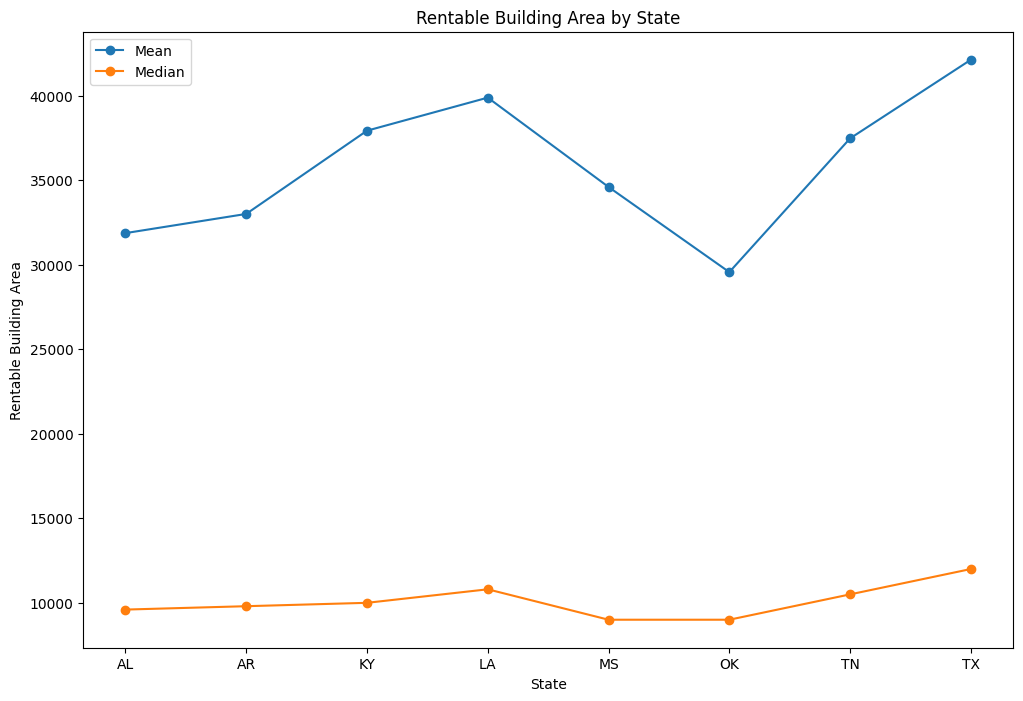

In [76]:
plt.figure(figsize=(12, 8))

# Plot each statistic
plt.plot(grouped['statecode'], grouped['mean'], marker='o', linestyle='-', label='Mean')
plt.plot(grouped['statecode'], grouped['median'], marker='o', linestyle='-', label='Median')
## plt.plot(grouped['statecode'], grouped['max'], marker='o', linestyle='-', label='Max')
## plt.plot(grouped['statecode'], grouped['min'], marker='o', linestyle='-', label='Min')

# Set the title and labels
plt.title('Rentable Building Area by State')
plt.xlabel('State')
plt.ylabel('Rentable Building Area')
plt.legend()

# Display the plot
plt.show()

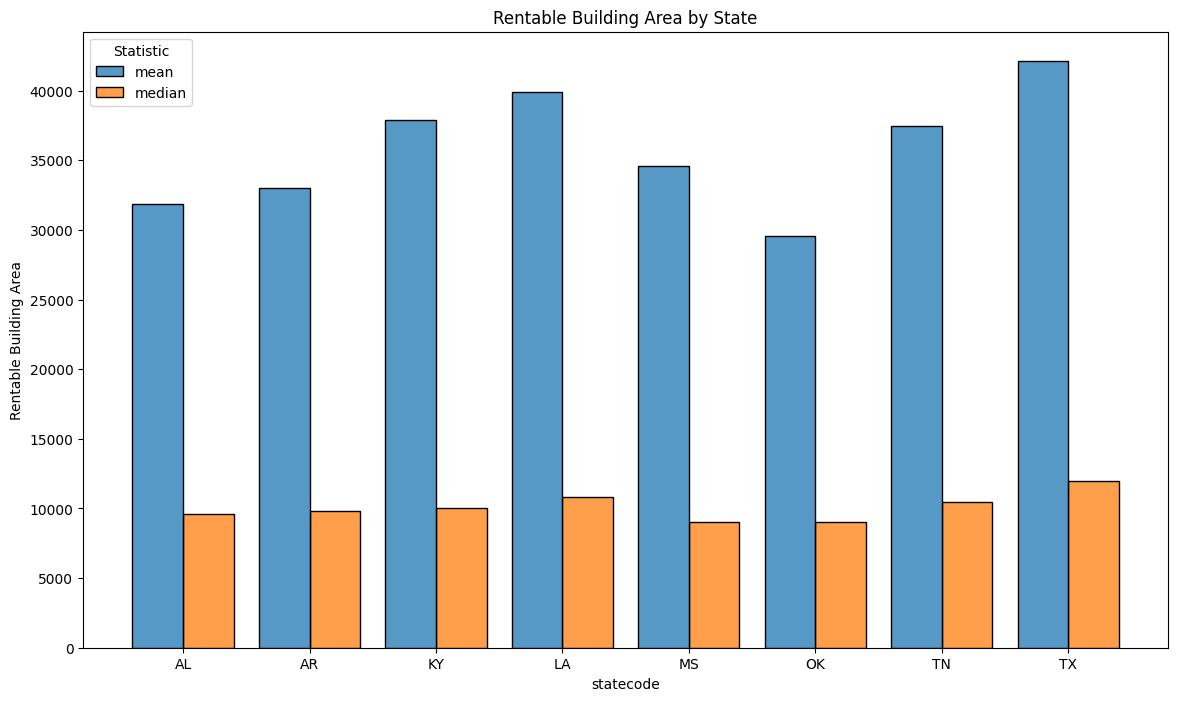

In [77]:
melted = pd.melt(grouped, id_vars=['statecode'], value_vars=['mean', 'median'], 
                 var_name='Statistic', value_name='RentableBuildingArea')

# Plot the histogram
plt.figure(figsize=(14, 8))
sns.histplot(data=melted, x='statecode', hue='Statistic', weights='RentableBuildingArea', multiple='dodge', shrink=0.8)

# Set the title and labels
plt.title('Rentable Building Area by State')
plt.xlabel('statecode')
plt.ylabel('Rentable Building Area')

# Display the plot
plt.show()